# Variational Calculation: Single Parameter Hydrogen

**Summary:** Consider the ground state wavefunction $\psi_0$ and energy $E_0$ that satisfy the Schr$\ddot{\text{o}}$dinger equation: 

$$\hat{H}\psi_0=E_0\psi_0$$

The variational principle states that if any other wavefuction $\phi$ is used, then the resulting energy will be greater than the ground state energy

$$E_\phi \geq E_0$$

This principle is demonstrated on hydrogen using a trial function $\phi = f(\alpha)$.

**Background:** Analytical solutions for the wavefunction of a system cannot be obtained for any but the most simple systems such as the hydrogen atom and the infinitely deep potential well. If the ground state wavefunction is not known, a trial function $\phi$ can be used in its place. According to the variational principle, $\psi_0$ represents a lower bound on energy $E_0$ and any trial function $\phi$ will result in an energy of at least $E_0$. Therefore, the trial function that results in the lowest possible energy could serve as an approximation for $\psi_0$.

Recall that:

$$E(\phi)=\frac{\int \phi^* H \phi}{\int \phi^* \phi}$$

For this example we will use a single trial function $\phi$ which, in addition to the spatial coordinate $\vec{r}$, depends on a paramter $\alpha$ which we will allow to vary. The function will be a gaussian
$$\phi=e^{-\alpha \vec{r}^2}$$

Given this function, there exists an $\alpha$ which will minimize the ground state energy $E_0$. Our task is to find this $\alpha$. Keep in mind that we do have an analytical solution for the ground state energy of hydrogen to which we can compare our answer. Even with the best possible choice of $\alpha$, our trial function may not approximate the ground state energy with high accuracy. In this case, we could try a new function . . . or perhaps a linear combination of functions.

But first, let's proceed with the task at hand.

**Setup:** After *some* algebra, we can show that for $\phi=e^{-\alpha \vec{r}^2}$

$$\int \phi^*\phi = \left(\frac{\pi}{2\alpha}\right)^{3/2}$$

$$E(\alpha) = \frac{3\hbar^2\alpha}{2m_e} - \frac{\sqrt{\alpha}e^2}{\sqrt{2}\epsilon_0 \pi^{3/2}}$$

Note that atomic units were not used.

Now, the expression for $E$ is simple enough that we could take the analytical derivative here and set that equal to zero in order to solve for the best $\alpha$; but for the sake of programming let's let the computer do the work.

**Code Implementation:** First let's import the optimization module in order to minimize the energy expression. We also need to import some important constansts, such as Bohr's radius, the math module, the numerical python module, and the plotting module.

In [28]:
import scipy.optimize as opt
import scipy.constants as const
import math
import numpy as np
import matplotlib.pyplot as plt
a0 = const.physical_constants['Bohr radius'][0]

Now, let's define functions that represent our trial function, the exact wavefunction, and the energy expression.

In [29]:
# exact hydrogen function
def exact_h(r):
    return math.sqrt(1 / (math.pi * a0 ** 3)) * math.exp(-r / a0)


# hydrogen trial function
def trial(r, alpha):
    return math.exp(-alpha * r ** 2)


# energy expression
def energy_trial(alpha):
    return (3 * const.hbar ** 2 * alpha / (2 * const.m_e) -
            const.e ** 2 * math.sqrt(alpha) / (math.sqrt(2) * math.pi ** (3/2) * const.epsilon_0))


# trial function multiplied by it's normalization constant
def normalized_trial(r, alpha):
    return (2 * alpha / math. pi) ** (3/4) * trial(r, alpha)


# a quick joule to eV conversion function
def joule_to_ev(x):
    return x * 6.241509126 * 10 ** 18


# hydrogen exact ground state energy
h0 = (-const.m_e * const.e ** 4) / (32 * math.pi ** 2 * const.epsilon_0 ** 2 * const.hbar ** 2)

Using the optimization toolbox, solve for the optimal $\alpha$.

In [30]:
# solve for alpha
opt_alpha = opt.minimize(energy_trial, np.array([1/a0]), method='Nelder-Mead')

Finally, print the result and plot the optimal trial function alongside the exact wavefunction.

Optimum Alpha: 1.0104046330680603e+20
Exact Energy: -13.605693012438113 (eV)
Approx Energy: -11.548870917975389 (eV)


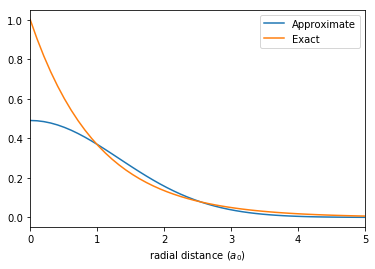

In [31]:
# look at minimized energy
print('Optimum Alpha: {}\nExact Energy: {} (eV)\nApprox Energy: {} (eV)'.format(
       opt_alpha.x[0], joule_to_ev(h0), joule_to_ev(energy_trial(opt_alpha.x[0]))))

# plot approximate and exact solutions
plot_prefactor = math.sqrt(math.pi * a0 ** 3)
x = np.linspace(0, 5*a0, 50)
y = [normalized_trial(i, opt_alpha.x) * plot_prefactor for i in x]
y_exact = [exact_h(i) * plot_prefactor for i in x]
plt.plot(x/a0, y, label='Approximate')
plt.plot(x/a0, y_exact, label='Exact')
plt.xlim(0, 5)
plt.legend()
plt.xlabel('radial distance $(a_0)$')
plt.show()

